# C5 Basic Operations on Images
de https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_basic_ops/py_basic_ops.html#basic-ops

In [1]:
#init modules
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

In [2]:
#get cwd
cwdir=os.getcwd()


In [3]:
#file name
baseDir=os.path.join('..','..','data')
baseFileName='messi.jpg'
fileName=os.path.join(baseDir, baseFileName)

(280, 450, 3)
378000
uint8


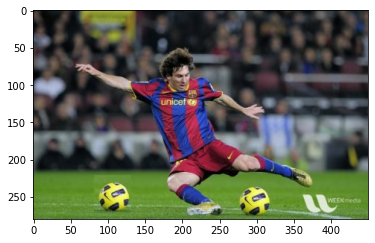

In [4]:
#load image in original format and display it, hacer click en la ventana y presionar cualquier tecla
img = cv2.imread(fileName,cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#set channels
(R, G, B) = (0, 1, 2)
#get props
print(img.shape)
print(img.size)
print(img.dtype)
#plot
plt.imshow(img)

## Accessing and Modifying pixel values

In [5]:
px = img[100,100]
print(px)

[68 63 57]


In [6]:
blue = img[100,100,B]
print(blue)

57


In [7]:
img[100,100] = [255,255,255]
print(img[100,100])

[255 255 255]


* Numpy is a optimized library for fast array calculations. So simply accessing each and 
every pixel values and modifying it will be very slow and it is discouraged.

* Above mentioned method is normally used for selecting a region of array, say first 5 rows and last 3 columns like that. For individual pixel access, Numpy array methods, array.item() and array.itemset() is considered to be better. But it always returns a scalar. So if you want to access all B,G,R values, you need to call array.item() separately for all.

In [8]:
#accessing RED value
1.5*img.item(10,10,2)

61.5

In [9]:
# modifying RED value
img.itemset((10,10,R),100)
img.item(10,10,R)

100

## Accessing Image Properties

In [10]:
print(img.shape)
print(img.size)
print(img.dtype)

(280, 450, 3)
378000
uint8


In [11]:
imgf=img.astype(np.double);
print(imgf.dtype)
img.item(10,10,2)

float64


41

### si queremos los tres canales habria que iterar con un for

In [12]:
img.itemset((10,10,R),200)
img.itemset((10,10,G),23)
channels=(R,G,B)
for c in channels:
    print(img.item(10,10,c))


200
23
41


## Image ROI

In [13]:
#define ROI
# Indexing or Slicing in numpy, just as in python in general, is 0 based and of the form [a, b), i.e. not including b.
r1, r2=230, 270
c1, c2=90, 130 

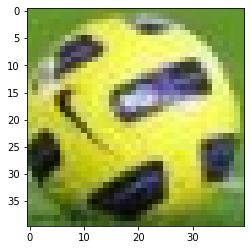

In [14]:
ball=img[r1:r2,c1:c2]
plt.imshow(ball)

In [15]:
#%whos

## tb podemos usar un slice object para seleccionar un conjunto de filas, columnas

In [16]:
r=slice(r1+10, r2-2)
c=slice(c1+1, c2-9)

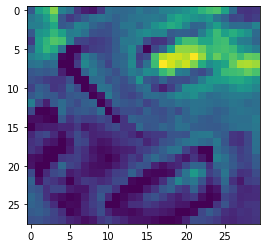

In [17]:
#seleccionamos del canal B de r1+10:r2-2 y de c1+1: c2-9
ball=img[r,c, B]
plt.imshow(ball)

In [18]:
#%whos

## Splitting and Merging Image Channels

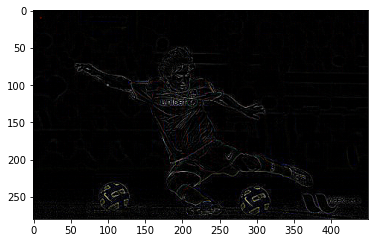

In [19]:
b,g,r = cv2.split(img)
b=cv2.Laplacian(b, cv2.CV_8U)
g=cv2.Laplacian(g, cv2.CV_8U)
r=cv2.Laplacian(r, cv2.CV_8U)

img1 = cv2.merge((b, g, r))
plt.imshow(img1)

In [20]:
x = cv2.split(img)
%whos

Variable       Type       Data/Info
-----------------------------------
B              int        2
G              int        1
R              int        0
b              ndarray    280x450: 126000 elems, type `uint8`, 126000 bytes (123.046875 kb)
ball           ndarray    28x30: 840 elems, type `uint8`, 840 bytes
baseDir        str        ..\..\data
baseFileName   str        messi.jpg
blue           uint8      57
c              slice      slice(91, 121, None)
c1             int        90
c2             int        130
channels       tuple      n=3
cv2            module     <module 'cv2' from 'C:\\U<...>\cv2.cp37-win_amd64.pyd'>
cwdir          str        C:\user\AQ_SCC\ejemplospythonaq\Notebooks\OpenCV
fileName       str        ..\..\data\messi.jpg
g              ndarray    280x450: 126000 elems, type `uint8`, 126000 bytes (123.046875 kb)
img            ndarray    280x450x3: 378000 elems, type `uint8`, 378000 bytes (369.140625 kb)
img1           ndarray    280x450x3: 378000 elems, type 

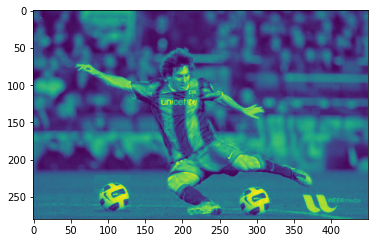

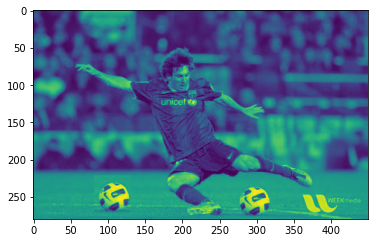

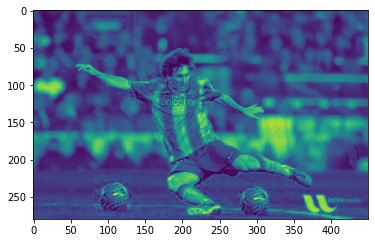

In [21]:
channels= cv2.split(img)
for c in channels:
    plt.figure()
    plt.imshow(c)
    plt.show()

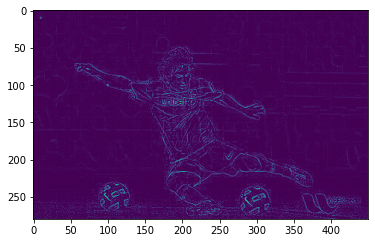

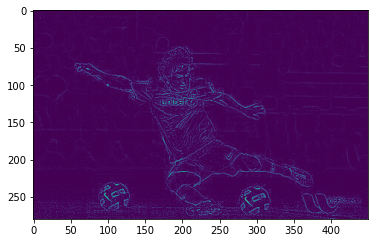

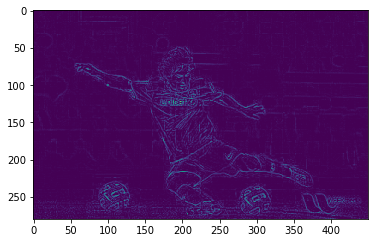

In [22]:
channels= cv2.split(img)
for  n in range(len(channels)) :
    c=channels[n];
    c=cv2.Laplacian(c, cv2.CV_8U) 
    channels[n]=c
    n += 1

for c in channels:
    plt.figure()
    plt.imshow(c)
    plt.show()

## Making Borders for Images (Padding)

In [23]:
BLUE = [255,0,0]

baseFileName='opencv_logo.png'
fileName=os.path.join(baseDir, baseFileName)
img1 = cv2.imread(fileName)

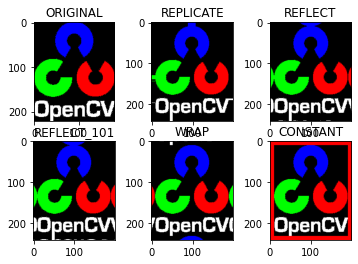

In [24]:
replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()